# Tutorial: Motion Primitive Generator

This tutorial demonstrates how are the motion primitives used in solving motion planning problems generated.

## 0. Preparation
Before you proceed with this tutorial, make sure that

* you have gone through the tutorial for **CommonRoad Input-Output**.
* you have installed all necessary modules for **CommonRoad Search** according to the installation manual.

The configuration parameters related to our motion primitive generator are stored in **generator_config.yaml**. The configuration file contains the following parameters:
* **output setting**:
    * output_directory: output directory of the generated motion primitives. The path can be either **relative** to this notebook or **absolute**.
* **vehicle setting**:
    * vehicle_type_id: id of vehicle type. 1: FORD_ESCORT, 2: BMW_320i, 3: VW_VANAGON
* **primitive setting**:
    * duration: time length of trajectory [s].
    * dt_simulation: time step for forwad state simulation [s]. Note that CommonRoad scenarios have a discrete time step dt of 0.1 seconds
    * velocity_sample_min: minimum sampling velocity [m/s].
    * velocity_sample_max: maximum sampling velocity [m/s].
    * num_sample_velocity: number of velocity samples.
    * steering_angle_sample_min: minimum sampling angle [rad]. Note that here we only consider steering to one side, as we will mirror the primitives afterwards.
    * steering_angle_sample_max: maximum sampling angle [rad]. If set to 0, it will be assigned the maximum permissible value given by the selected vehicle parameter.
    * num_sample_steering_angle: number of steering angle samples
* **sample trajectory setting**: 
    * num_segment_trajectory: number of segments in sample trajectories
    * num_simulations: number of sample trajectories to be generated

**Note**: Generating too sparse primitives (low branching factor) may restrict the search space such that no feasible solution can be found. On the other hand, generating too dense primitives (high branching factor) may dramatically inscrease the time of search. Thus striking a balance between diversity and efficiency is important here.

## 1. Loading configuration file and parameters

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from MotionPrimitiveGenerator import MotionPrimitiveGenerator as MPG

In [2]:
# specify path to configuration file
path_file_config = "./generator_config.yaml"

# load configuration file
MPG.load_configuration(path_file_config)

## 2. Generating motion primitives
### 2.1 Generating motion primitives which steers to one side only
The attributes of the states in a motion primitive are:
- x position
- y position
- steering angle
- velocity
- orientation
- time step

Here we only generate motion primitives with positive steering angles, as the other half can be easily obtained by mirroring them.

In [3]:
list_motion_primitives = MPG.generate_motion_primitives()

Total possible combinations of states:  1764
Generating motion primitives...



Number of feasible motion primitives: 120


We plot the generated motion primitives:

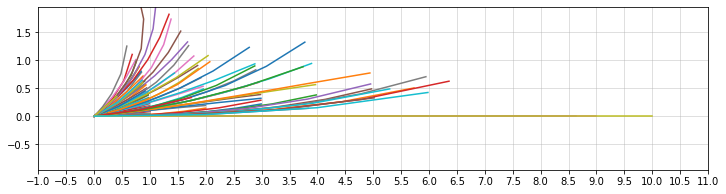

In [4]:
fig = plt.figure(figsize=(12, 3))
ax = fig.gca()

for traj in list_motion_primitives:
    list_x = [state.position[0] for state in traj.state_list]
    list_y = [state.position[1] for state in traj.state_list]
    plt.plot(list_x, list_y)

ax.set_xticks(np.arange(-5, 20, 0.5))
ax.set_yticks(np.arange(-5, 5., 0.5))
plt.axis('equal')
plt.grid(alpha=0.5)
plt.xlim((-1,11))
plt.ylim((-1,2))
plt.show()

### 2.2 Mirroring motion primitives
As we only computed primitives that have a positive steering angle, we now mirror them to get the other half of the feasible primitives.

In [5]:
list_motion_primitives_mirrored = MPG.create_mirrored_primitives(list_motion_primitives)
print("Total number of primitives (mirrored included): ", len(list_motion_primitives_mirrored))

Total number of primitives (mirrored included):  224


We now plot the final generated motion primitives.

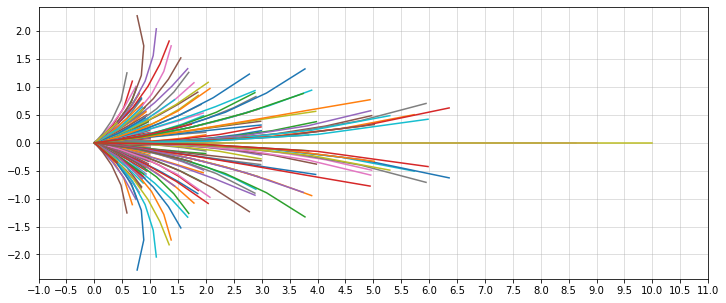

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

for traj in list_motion_primitives_mirrored:
    list_x = [state.position[0] for state in traj.state_list]
    list_y = [state.position[1] for state in traj.state_list]
    plt.plot(list_x, list_y)

ax.set_xticks(np.arange(-5, 20, 0.5))
ax.set_yticks(np.arange(-5, 5., 0.5))
plt.axis('equal')
plt.grid(alpha=0.5)
plt.xlim((-1,11))
plt.ylim((-2,2))
plt.show()

### 2.3 Checking average branching factor of  the generated motion primitives
We can inspect the average branching factor of the generated primitives to have a rough idea how many successors a given motion primitive can have.

In [7]:
branching_factor_average = MPG.compute_branching_factor(list_motion_primitives_mirrored)
print("Average branching factor of primitives: ", branching_factor_average)


Average branching factor of primitives:  5.705357142857143


### 3. Generating sample trajectories
We create some sample trajectories with the motion primitives that we have just generated.

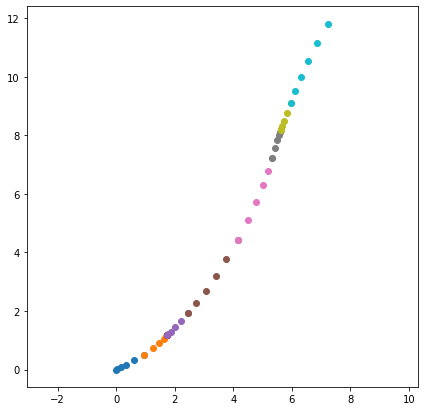

This is not good :(


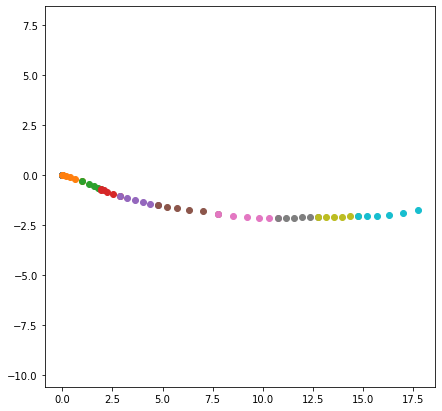

This is not good :(


In [8]:
MPG.generate_sample_trajectories(list_motion_primitives_mirrored)

## 4. Saving motion primitives to XML files
We save the generated motion primitves to XML files, which are output tothe directory specified in the configuration file.

In [9]:
MPG.save_motion_primitives(list_motion_primitives_mirrored)

File saved: V_0.0_20.0_Vstep_4.0_SA_-1.066_1.066_SAstep_0.18_T_0.5_Model_BMW_320i.xml
